In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
##importing functions from sklearn so we don't have to type sklearn____
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

location = "datasets/DC_Properties.csv"



print(dc_df.columns)


Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
dc_df.shape

(158957, 49)

In [24]:
dc_df = dc_df[np.isfinite(dc_df['PRICE'])]
dc_df.shape

(98216, 49)

In [25]:
dc_df.isnull().sum()

Unnamed: 0                0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             40316
ROOMS                     0
BEDRM                     0
AYB                     112
YR_RMDL               40542
EYB                       0
STORIES               40349
SALEDATE                  1
PRICE                     0
QUALIFIED                 0
SALE_NUM                  0
GBA                   40316
BLDG_NUM                  0
STYLE                 40316
STRUCT                40316
GRADE                 40316
CNDTN                 40316
EXTWALL               40316
ROOF                  40316
INTWALL               40316
KITCHENS              40317
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             57900
LIVING_GBA            57900
FULLADDRESS           40651
CITY                  40647
STATE               

In [26]:
dc_df=dc_df[np.isfinite(dc_df['ZIPCODE'])]

In [27]:
missing_price = dc_df.loc[dc_df['PRICE'].isnull()]
missing_price.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


In [28]:
#dc_df.groupby(['BEDRM', 'BATHRM', 'HF_BATHRM', 'LANDAREA'])['PRICE'].mean()
dc_df.groupby(['ROOMS', 'BATHRM', 'HF_BATHRM', 'LANDAREA'])['PRICE'].mean()

ROOMS  BATHRM  HF_BATHRM  LANDAREA
0      0       0          450         6.000000e+03
                          817         1.100000e+07
                          934         4.575000e+05
                          978         5.680000e+05
                          1089        4.000000e+05
                          1688        9.010000e+05
                          1914        6.153800e+04
                          2150        2.000000e+06
                          2546        6.625000e+05
                          2852        5.405000e+05
                          3011        1.500000e+05
                          7717        5.175000e+06
                          11766       3.400000e+06
                          21017       2.500000e+07
       1       0          97          2.015000e+05
                          101         1.895778e+05
                          112         3.110000e+05
                          131         2.000000e+05
                          410         2.030000e

In [29]:
#dc_df['PRICE'].fillna(dc_df.groupby(['LANDAREA', 'BEDRM', 'HF_BATHRM', 'FIREPLACES', 'EYB', 'SOURCE', 'ZIPCODE'])['PRICE'].transform('mean'), inplace=True)
#dc_df['PRICE']

In [30]:
##drop columns
#dc2=dc_df.drop(['ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD'], axis=1)
#dc2.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD',
       'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [31]:
bins = ['NW','NE','SE','SW']
group_names=[1,2,3,4]
dc_df('QUADn')= pd.cut(dc_df['QUADRANT'], bins, labels=group_names)
dc_df.head()

SyntaxError: can't assign to function call (<ipython-input-31-84236032810a>, line 3)

In [ ]:
dc_df['PRICE'].fillna(dc_df.groupby(['LANDAREA', 'BEDRM', 'HF_BATHRM', 'FIREPLACES', 'EYB', 'SOURCE', 'ZIPCODE'])['PRICE'].transform('mean'), inplace=True)
dc_df['PRICE']

In [ ]:
#add numeric value to quadrant
def score_to_numeric(x):
    if x=='NW':
        return 1
    if x=='NE':
        return 2
    if x=='SE':
        return 3
    if x=='SW':
        return 4
dc_df['QUAD_VAL']= dc_df['QUADRANT'].apply(score_to_numeric)
dc_df
                    

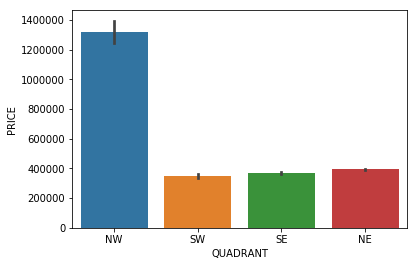

In [34]:
sns.barplot('QUADRANT','PRICE',data=dc_df)

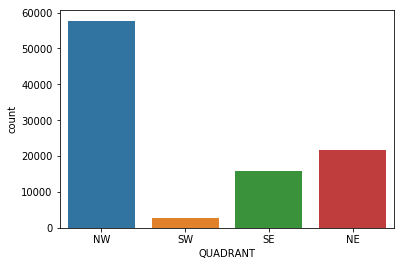

In [36]:
sns.countplot('QUADRANT',data=dc_df)

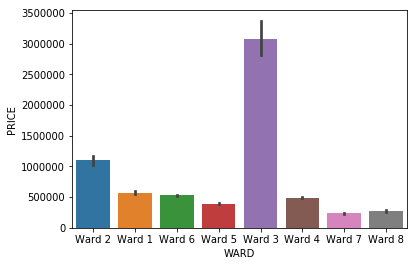

In [18]:
sns.barplot('WARD','PRICE',data=dc_df)

In [37]:
p2df = 

KeyError: ('ZIPCODE', 'PRICE')